In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import seaborn as sns

In [24]:
data_dic = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data_class_dic = ["iris-setosa", "iris-versicolour", "iris-virginica"]
data = pd.read_csv("./dataset/iris.data", sep=",", names=data_dic)

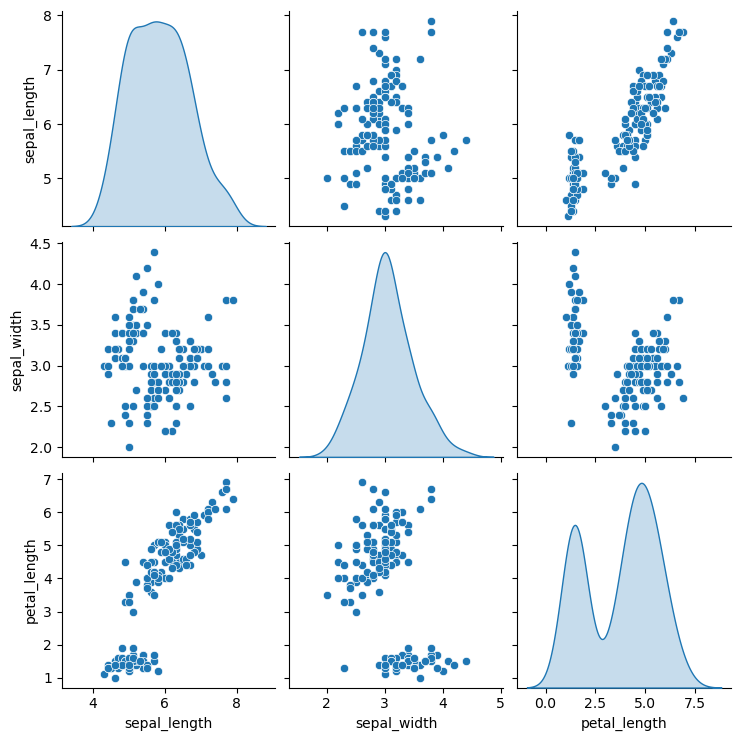

In [27]:
data_ohe = pd.get_dummies(data)
X = data_ohe.iloc[:, :3]
y = data_ohe.iloc[:, 3]

sns.pairplot(X[["sepal_length", "sepal_width", "petal_length"]], diag_kind="kde")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)
print(X_train.shape)

model = Sequential([
    Dense(64, input_shape=(3, ), activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])

model.summary()

(49, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss="mse", optimizer="adam")
result = model.fit(X_train, y_train, validation_split=0.33, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 313ms/step - loss: 1.3976 - val_loss: 0.9620
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9639 - val_loss: 0.6190
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 0.6305 - val_loss: 0.3726
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3968 - val_loss: 0.2128
Epoch 5/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2480 - val_loss: 0.1245
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 0.1644 - val_loss: 0.0928
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 0.1335 - val_loss: 0.1028
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 0.1404 - val_loss: 0.1384
Epoch 9/500
1/1 [==============================] - 0s 19ms/step - loss: 0.1699 - val_loss: 0.1818
Epoch 10/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2058 - val_loss: 0.2173
Epoch 11/500
1/1 [

In [33]:
test_pred = model.predict(X_test)
y_test

4/4 [==============================] - 0s 2ms/step


73     1.2
18     0.3
118    2.3
78     1.5
76     1.4
      ... 
8      0.2
13     0.1
119    1.5
125    1.8
3      0.2
Name: petal_width, Length: 101, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


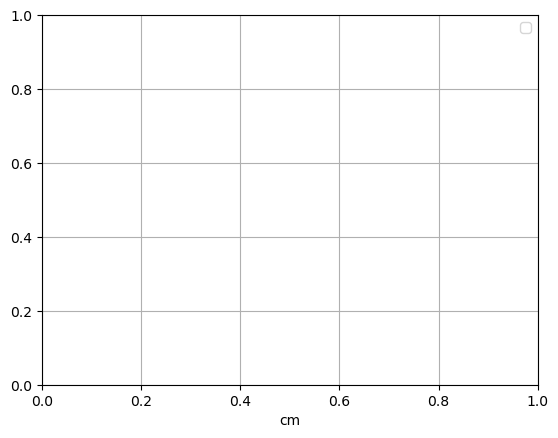

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

points_df = pd.DataFrame(data.iloc[:, 3])

ax.set_xlabel("cm")
ax.legend()
ax.grid()